In [2]:
#Project_1 Team 3

#Step 1: Import necessary components.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats

#Step 2: Importing the data. 
data_file = pd.read_csv('../Resources/NFWBS_PUF_2016_data.csv')
data_file.head()


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [3]:
#Step 3: Use the shape function to see how many columns and rows there are.
data_file.shape

(6394, 217)

In [4]:
#Step 4: Find the column names.
data_file.columns


#Findings: there are way too many columns for it to display all of the column names.

Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
       'FWB1_1', 'FWB1_2', 'FWB1_3',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=217)

In [5]:
#Step 5: See how many data points are in each column. 
data_file.count()


PUF_ID         6394
sample         6394
fpl            6394
SWB_1          6394
SWB_2          6394
               ... 
PPT612         6394
PPT1317        6394
PPT18OV        6394
PCTLT200FPL    6394
finalwt        6394
Length: 217, dtype: int64

In [6]:
#Step 6: See how many null answers are in each column.
data_file.isnull().sum()

PUF_ID         0
sample         0
fpl            0
SWB_1          0
SWB_2          0
              ..
PPT612         0
PPT1317        0
PPT18OV        0
PCTLT200FPL    0
finalwt        0
Length: 217, dtype: int64

In [7]:
#Step 7: Drop all null values in the dataset.
data_file.dropna

#Findings: There were no null values in the dataset. The reason why this is the case is because whenever
#the participant in the survey didn't respond to a question, -4 was entered into that space. 

<bound method DataFrame.dropna of       PUF_ID  sample  fpl  SWB_1  SWB_2  SWB_3  FWBscore  FWB1_1  FWB1_2  \
0      10350       2    3      5      5      6        55       3       3   
1       7740       1    3      6      6      6        51       2       2   
2      13699       1    3      4      3      4        49       3       3   
3       7267       1    3      6      6      6        49       3       3   
4       7375       1    3      4      4      4        49       3       3   
...      ...     ...  ...    ...    ...    ...       ...     ...     ...   
6389   11220       3    3      6      7      7        61       3       3   
6390   13118       3    2      7      7      7        59       3       4   
6391    8709       1    3      5      6      6        59       3       4   
6392    8515       1    3      5      5      5        46       2       2   
6393    8516       3    2      4      6      4        49       3       3   

      FWB1_3  ...  PPMSACAT  PPREG4  PPREG9  PPT01  P

In [8]:
#Step 8: Complete a count to see if any rows were dropped. 
data_file.count()

#Findings: No rows were dropped. 

PUF_ID         6394
sample         6394
fpl            6394
SWB_1          6394
SWB_2          6394
               ... 
PPT612         6394
PPT1317        6394
PPT18OV        6394
PCTLT200FPL    6394
finalwt        6394
Length: 217, dtype: int64

In [9]:
#Step 9: Drop all values that are equal to -4.
data_after_drop_df = data_file[data_file != -4].dropna()

#Do another count to see how many "null" answers were in the dataset.
data_after_drop_df.count()

#Findings: There was only one row that had any responses that were -4. Our team looked into
#this further and there was only one person who did not answer all of the survey questions.

PUF_ID         6393
sample         6393
fpl            6393
SWB_1          6393
SWB_2          6393
               ... 
PPT612         6393
PPT1317        6393
PPT18OV        6393
PCTLT200FPL    6393
finalwt        6393
Length: 217, dtype: int64

In [10]:
#Step 10: check for duplicates.
duplicated_rows = data_after_drop_df.duplicated()
data_after_drop_df.loc[data_after_drop_df.duplicated()]

data_after_duplicates_df = data_after_drop_df.drop_duplicates()

data_after_duplicates_df.count()

cleaned_data = data_after_duplicates_df
cleaned_data.head()


,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5.0,5.0,6.0,55.0,3.0,3.0,3.0,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6.0,6.0,6.0,51.0,2.0,2.0,3.0,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4.0,3.0,4.0,49.0,3.0,3.0,3.0,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6.0,6.0,6.0,49.0,3.0,3.0,3.0,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4.0,4.0,4.0,49.0,3.0,3.0,3.0,...,1,2,4,0,0,1,0,4,1,4.260668


In [11]:
#Step 11: Check for outliers. This will be completed on a per question basis. 

In [12]:
"""Reminder our overarching question: How do these specific financial factors effect 
the people's financial well-being?"""

"Reminder our overarching question: How do these specific financial factors effect \nthe people's financial well-being?"

In [13]:
#Step 12: Question 1 Work:Group


1
-1
5
-1
95.0
-1.0
Repayment of Student Debt            6347
Ability to Pay Your Bills on Time    6347
Financial Well-Being Score           6347
dtype: int64


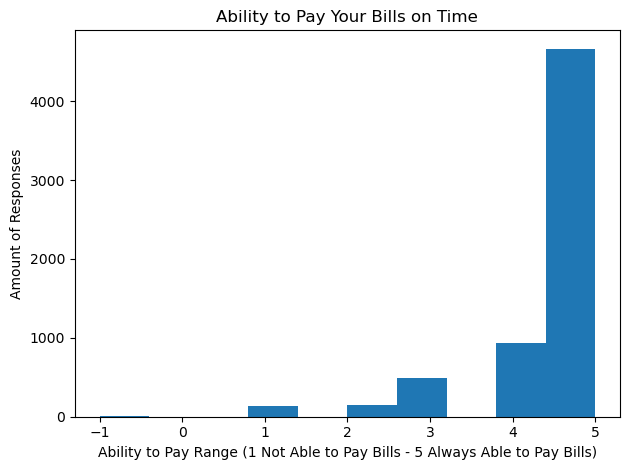

In [60]:
#Step 13: Question 2 Work: Kerek
#Question: Do students with high debt have trouble paying bills on time? 

#Look at BENEFITS_4 Tuition Reimbursement and/or Student Debt Repayment 
#Look at MANAGE1_1 Paid all your bills on time Survey item (modified) 

#Create a new dataframe with only those variables as columns.
student_data = cleaned_data[['BENEFITS_4','MANAGE1_1', 'FWBscore']]

student_df = pd.DataFrame(student_data)

#Rename the columns.
renamed_data = student_df.rename(columns={"BENEFITS_4" : "Repayment of Student Debt", "MANAGE1_1" : "Ability to Pay Your Bills on Time", "FWBscore" : "Financial Well-Being Score"})
renamed_data.head()

#Find the max answer for Repayment of Student Debt
max_debt_repayment = renamed_data['Repayment of Student Debt'].max()
print(max_debt_repayment)

#Find the min answer for Repayment of Student Debt
min_debt_repayment = renamed_data['Repayment of Student Debt'].min()
print(min_debt_repayment)

#Repayment of Student Debt meaning: -1: refused, 0: No, 1: Yes

#Find the max answer for Ability to Pay Your Bills on Time
max_ability_to_pay = renamed_data['Ability to Pay Your Bills on Time'].max()
print(max_ability_to_pay)

#Find the min answer for Ability to Pay Your Bills on Time
min_ability_to_pay = renamed_data['Ability to Pay Your Bills on Time'].min()
print(min_ability_to_pay)

#Ability to pay meaning: -1: refused, 1: Never, 
#2 : Seldom, 3: Sometimes, 4: Often, 5: Always.

#Financial Well-Being Score: the lower the number the worse the financial well-being is. 
#Find the max answer for Ability to Pay Your Bills on Time
max_FWBscore = renamed_data['Financial Well-Being Score'].max()
print(max_FWBscore)

#Find the min answer for Ability to Pay Your Bills on Time
min_FWBscore = renamed_data['Financial Well-Being Score'].min()
print(min_FWBscore)


"""Now that I know what the data means, I am going to take out the -1 values for each of the columns since that value is associated
with refusing to answer the question. 
"""

drop_minus_one = renamed_data[renamed_data != -1].dropna()
print(drop_minus_one.count())

"""Put the data in a histogram of the ability to pay bills column."""

#Create the histogram.

plt.hist(renamed_data['Ability to Pay Your Bills on Time'])

plt.title('Ability to Pay Your Bills on Time')
plt.xlabel('Ability to Pay Range (1 Not Able to Pay Bills - 5 Always Able to Pay Bills)')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: The vast majority of people can pay their bills. 

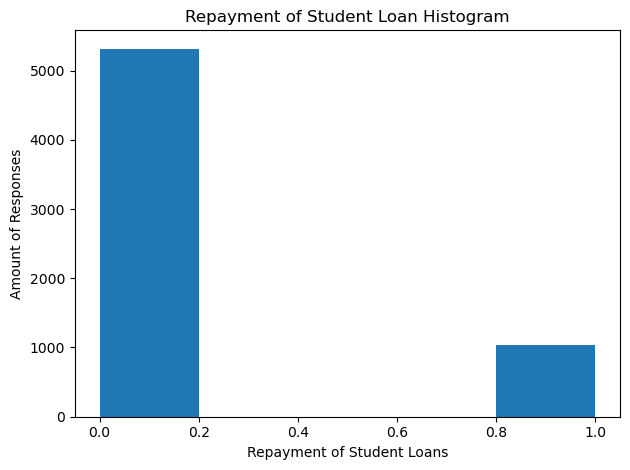

In [47]:
#Create the histogram.
plt.hist(renamed_data['Repayment of Student Debt'])

plt.xlim(-.05,1.05)

plt.title('Repayment of Student Loan Histogram')
plt.xlabel('Repayment of Student Loans')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#The vast majority of people aren't paying their student debt off. This likely is because the people who took the survey
#don't have student debt. 

The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is 0.03.


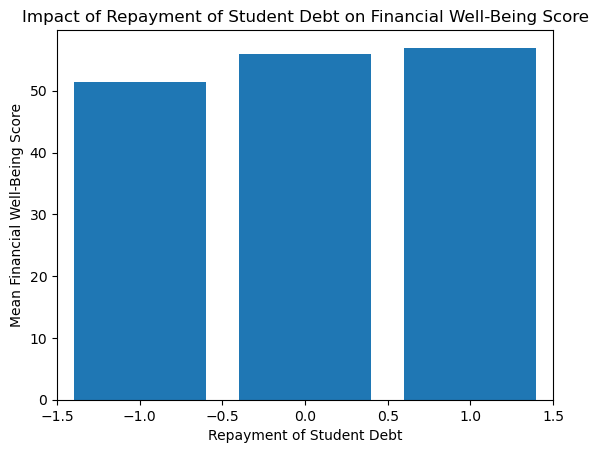

In [48]:
#Create the average FWBscore for each of the above responses. 
column = 'Repayment of Student Debt'

#Set the x axis range to better show the data.
plt.xlim(-1.5,1.5)

#Create a bar graph of the average FWBscore for each survey answer. 
grouped = renamed_data.groupby(column).mean()
plt.bar(grouped.index, grouped['Financial Well-Being Score'])
plt.xlabel(column)
plt.ylabel('Mean Financial Well-Being Score')
plt.title('Impact of ' + column + ' on Financial Well-Being Score')
plt.tight_layout

#Find the correlation.
correlation_FFWB = st.pearsonr(renamed_data['Repayment of Student Debt'],renamed_data['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is {round(correlation_FFWB[0],2)}.')

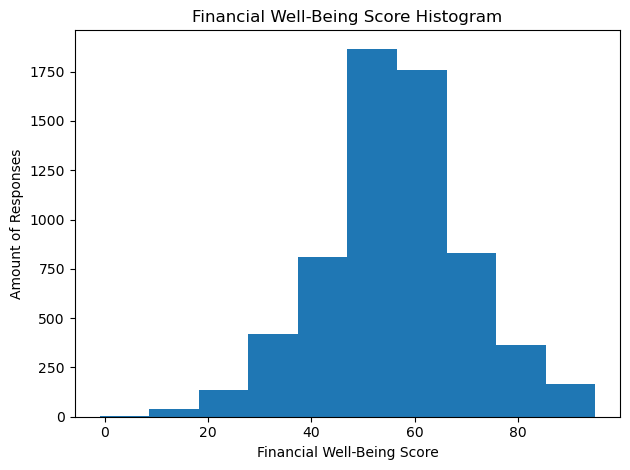

In [16]:
#Create a histogram for the Financial Well-Being Score
plt.hist(renamed_data['Financial Well-Being Score'])

plt.title('Financial Well-Being Score Histogram')
plt.xlabel('Financial Well-Being Score')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: The financial well-being score has a curve that is slightly skewed to the right. This means that on average people 
#have a higher financial well-being score.

c:\Users\kerek\anaconda3\envs\dev\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is 0.42.


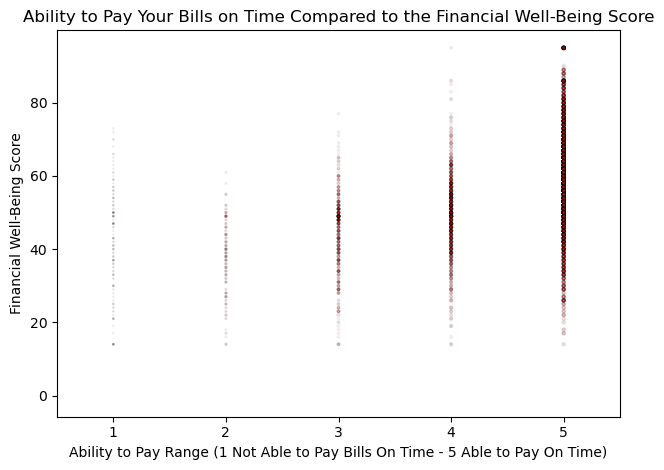

In [17]:
#Create a scatter plot comparing the financial well-being score and the ability to pay bills on time variable.
plt.scatter(renamed_data['Ability to Pay Your Bills on Time'], renamed_data['Financial Well-Being Score'], marker="o", facecolors="red", edgecolors="black",
            s=renamed_data['Ability to Pay Your Bills on Time'], alpha=0.05)

#Find the correlation.
correlation_FFWB = st.pearsonr(renamed_data['Ability to Pay Your Bills on Time'],renamed_data['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is {round(correlation_FFWB[0],2)}.')

#Adding the x axis limit.
plt.xlim(0.5,5.5)

#Adding labels to the Graphic.
plt.title('Ability to Pay Your Bills on Time Compared to the Financial Well-Being Score')
plt.xlabel('Ability to Pay Range (1 Not Able to Pay Bills On Time - 5 Able to Pay On Time)')
plt.ylabel('Financial Well-Being Score')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

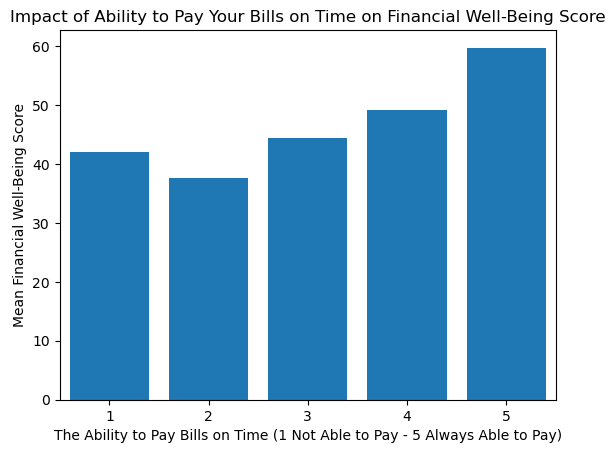

In [59]:
#Create the average FWBscore for each of the above responses. 
column = 'Ability to Pay Your Bills on Time'

#Set the x axis range to better show the data.
plt.xlim(0.5,5.5)

#Create a bar graph of the average FWBscore for each survey answer. 
grouped = renamed_data.groupby(column).mean()
plt.bar(grouped.index, grouped['Financial Well-Being Score'])
plt.xlabel("The Ability to Pay Bills on Time (1 Not Able to Pay - 5 Always Able to Pay)")
plt.ylabel('Mean Financial Well-Being Score')
plt.title('Impact of ' + column + ' on Financial Well-Being Score')
plt.tight_layout

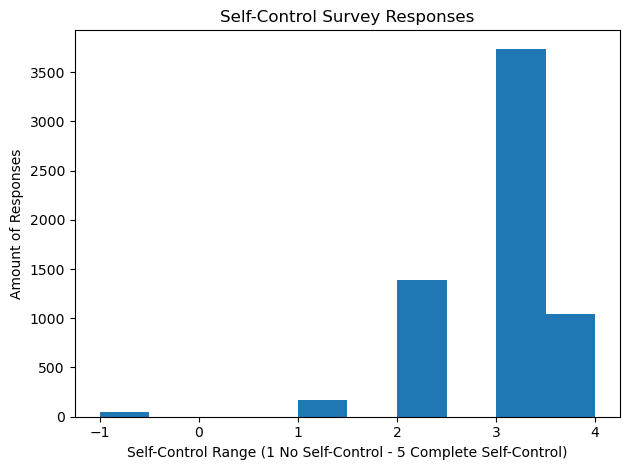

In [54]:
#Step 14: Question 3 Work: Kerek 
self_control_df = cleaned_data[['FWBscore', 'SELFCONTROL_2', 'FRUGALITY']]


#Rename columns
Q3_renamed_df = self_control_df.rename(columns={'SELFCONTROL_2' : 'Self-Control', 'FRUGALITY': 'Frugality', 'FWBscore' : 'Financial Well-Being Score' })

#Create a histogram of the Self Control and Frugality columns. 
#This variable is from 1 through 4. The question is "I am good at resisting temptation. 
#Here is what they mean: 1 = Not at all, 2 = Not very well, 3 = Very well,4 = Completely well

plt.hist(Q3_renamed_df['Self-Control'])

plt.title('Self-Control Survey Responses')
plt.xlabel('Self-Control Range (1 No Self-Control - 5 Complete Self-Control)')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: There is a right skew to the histogram. This means that most people say they resist temptation
#very well and completely. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

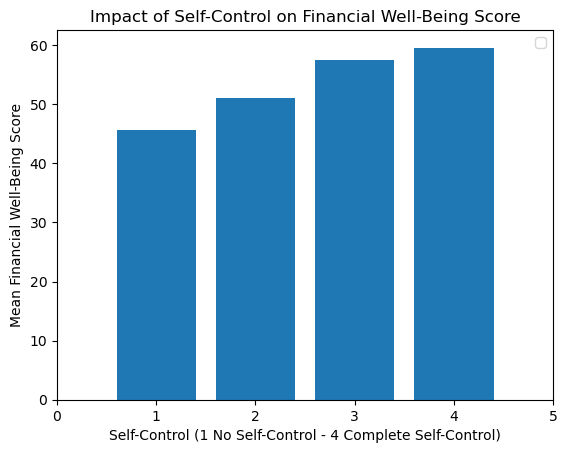

In [55]:
#Create the average FWBscore for each of the above responses. 
column = 'Self-Control'

#Set the x axis range to better show the data.
plt.xlim(0,5)

#Create a bar graph of the average FWBscore for each survey answer. 
grouped = Q3_renamed_df.groupby(column).mean()
plt.bar(grouped.index, grouped['Financial Well-Being Score'])
plt.xlabel("Self-Control (1 No Self-Control - 4 Complete Self-Control)")
plt.ylabel('Mean Financial Well-Being Score')
plt.title('Impact of ' + column + ' on Financial Well-Being Score')
plt.legend()
plt.tight_layout

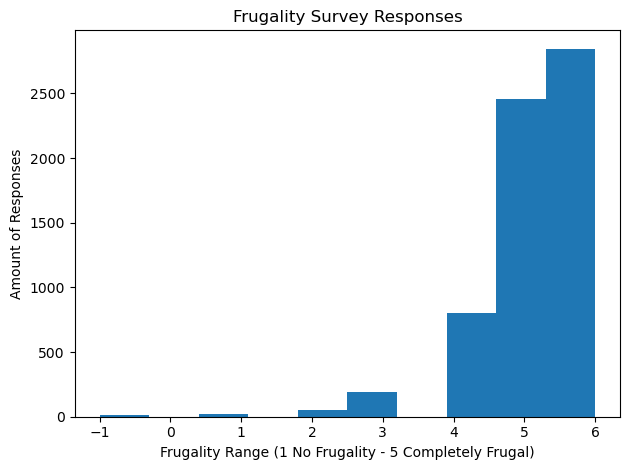

In [20]:
#Create a histogram for the Frugality variable. 
#The Frugality question is I can reuse an item I already have, there is no sense in buying somehting new. 
#The variable range is 1 through 6: 1 = Strongly Disagree, 2 = Disagree, 3 = Disagree slightly, 4 = Agree slightly
# 5 = Agree, 6 = Strongly Agree.

plt.hist(Q3_renamed_df['Frugality'])

#plt.xlim(0.1,6.1)

plt.title('Frugality Survey Responses')
plt.xlabel('Frugality Range (1 No Frugality - 5 Completely Frugal)')
plt.ylabel('Amount of Responses')
plt.tight_layout()

#Findings: Large right skew meaning that most people slightly agree to strongly agree and item 
#can be used more than once


The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is 0.1.


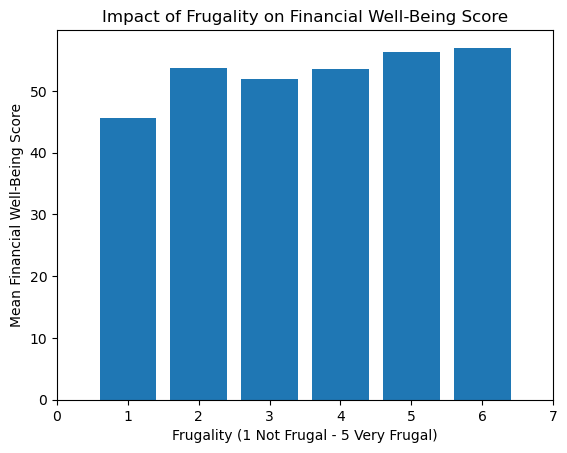

In [58]:
#Create the average FWBscore for each of the above responses. 
column = 'Frugality'

#Set the x axis range to better show the data.
plt.xlim(0,7)

#Create a bar graph of the average FWBscore for each survey answer. 
grouped = Q3_renamed_df.groupby(column).mean()
plt.bar(grouped.index, grouped['Financial Well-Being Score'])
plt.xlabel('Frugality (1 Not Frugal - 5 Very Frugal)')
plt.ylabel('Mean Financial Well-Being Score')
plt.title('Impact of ' + column + ' on Financial Well-Being Score')
plt.tight_layout

#Find the correlation.
correlation_FFWB = st.pearsonr(Q3_renamed_df['Frugality'],Q3_renamed_df['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and the Ability to Pay Your Bills on Time is {round(correlation_FFWB[0],2)}.')

c:\Users\kerek\anaconda3\envs\dev\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


The correlation between the Financial Well-Being Score and Frugality is 0.1.


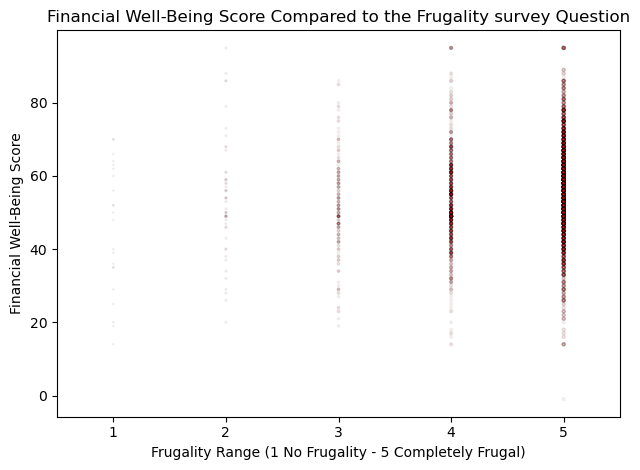

In [21]:
#Create a scatter plot for frugality compared to the financial well-being score. 
plt.scatter(Q3_renamed_df['Frugality'], Q3_renamed_df['Financial Well-Being Score'], marker="o", facecolors="red", edgecolors="black",
            s=Q3_renamed_df['Frugality'], alpha=0.05)

#Find the correlation.
correlation_FFWB = st.pearsonr(Q3_renamed_df['Frugality'],Q3_renamed_df['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and Frugality is {round(correlation_FFWB[0],2)}.')

#Adding an x axis limit.
plt.xlim(.5,5.5)

#Adding labels to the graphic. 
plt.title('Financial Well-Being Score Compared to the Frugality survey Question')
plt.xlabel('Frugality Range (1 No Frugality - 5 Completely Frugal)')
plt.ylabel('Financial Well-Being Score')
plt.tight_layout()

The correlation between the Financial Well-Being Score and Self Control is 0.22.


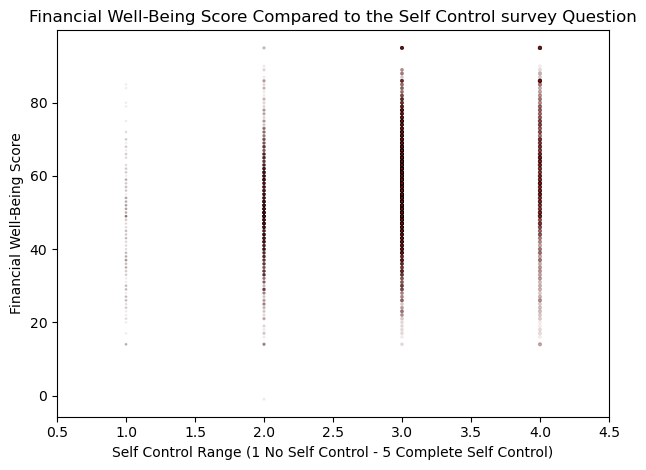

In [22]:
#Create a scatter plot for frugality compared to the financial well-being score. 
plt.scatter(Q3_renamed_df['Self Control'], Q3_renamed_df['Financial Well-Being Score'], marker="o", facecolors="red", edgecolors="black",
            s=Q3_renamed_df['Self Control'], alpha=0.05)

#Find the correlation.
correlation_SCFWB = st.pearsonr(Q3_renamed_df['Self Control'],Q3_renamed_df['Financial Well-Being Score'])
print(f'The correlation between the Financial Well-Being Score and Self Control is {round(correlation_SCFWB[0],2)}.')

#Set the x axis limit.
plt.xlim(0.5,4.5)

#Add labels to the graphic. 
plt.title('Financial Well-Being Score Compared to the Self Control survey Question')
plt.xlabel('Self Control Range (1 No Self Control - 5 Complete Self Control)')
plt.ylabel('Financial Well-Being Score')
plt.tight_layout()

The correlation between Self Control and Frugality is 0.25.


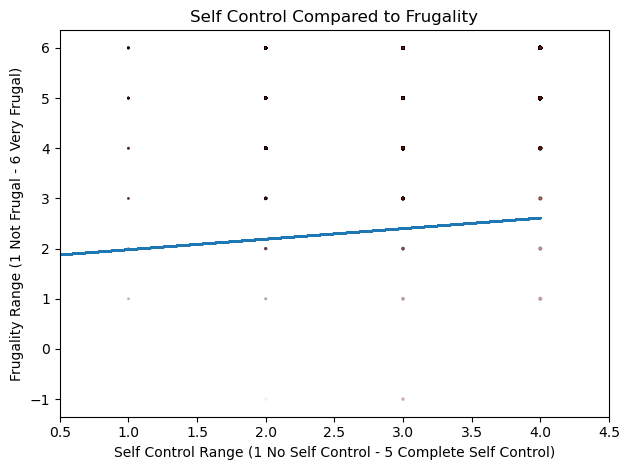

In [23]:
#Compare the Self Control variable with the Frugality Variable. 
plt.scatter(Q3_renamed_df['Self Control'], Q3_renamed_df['Frugality'], marker="o", facecolors="red", edgecolors="black",
            s=Q3_renamed_df['Self Control'], alpha=0.05)


#Find the correlation.
correlation_SCF = st.pearsonr(Q3_renamed_df['Self Control'],Q3_renamed_df['Frugality'])
print(f'The correlation between Self Control and Frugality is {round(correlation_SCF[0],2)}.')

pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(Q3_renamed_df['Frugality'], Q3_renamed_df['Self Control'])
pe_fit = pe_slope * Q3_renamed_df['Self Control'] + pe_int
plt.plot(Q3_renamed_df['Self Control'],pe_fit,"--")

plt.xlim(.5,4.5)
plt.title('Self Control Compared to Frugality')
plt.xlabel('Self Control Range (1 No Self Control - 5 Complete Self Control)')
plt.ylabel('Frugality Range (1 Not Frugal - 6 Very Frugal)')
plt.tight_layout()


c:\Users\kerek\anaconda3\envs\dev\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


The correlation between the Financial Well-Being Score and the Financial Skill Score is 0.5.


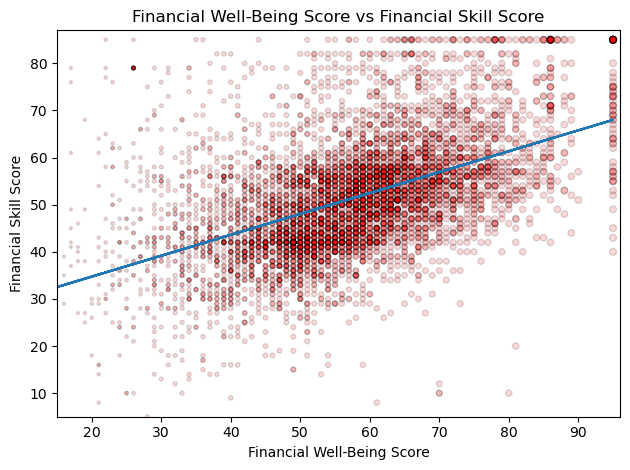

In [24]:
#Question 4: Is there a correlation between the financial well-being score and the financial skill score?
#Compare the FWBscore to teh FSscore (Financial Skill Score).
score_vs_df = cleaned_data[['FWBscore', 'FSscore']]

skill_df = score_vs_df.rename(columns={'FWBscore' : 'Financial Well-Being Score', 'FSscore' : 'Financial Skill Score'})

plt.xlim(15,96)
plt.ylim(5,87)

plt.title('Financial Well-Being Score vs Financial Skill Score')
plt.xlabel('Financial Well-Being Score')
plt.ylabel('Financial Skill Score')

plt.scatter(skill_df['Financial Well-Being Score'], skill_df['Financial Skill Score'], marker=".", facecolors="red", edgecolors="black",
            s=skill_df['Financial Well-Being Score'], alpha=0.15)




pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(skill_df['Financial Well-Being Score'], skill_df['Financial Skill Score'])
pe_fit = pe_slope * skill_df['Financial Well-Being Score'] + pe_int
plt.plot(skill_df['Financial Well-Being Score'],pe_fit,"--")

plt.tight_layout()

#Find the correlation.
correlation = st.pearsonr(skill_df['Financial Well-Being Score'],skill_df['Financial Skill Score'])

correlation_cof = str(correlation)
print(f'The correlation between the Financial Well-Being Score and the Financial Skill Score is {round(correlation[0],2)}.')

#Findings: The there is a moderately positive correlation between the Financial Well-Being Score and the 
#Financial Skill Score.

The correlation between KHscore and FWBscore is: PearsonRResult(statistic=0.4952179619175009, pvalue=0.0)


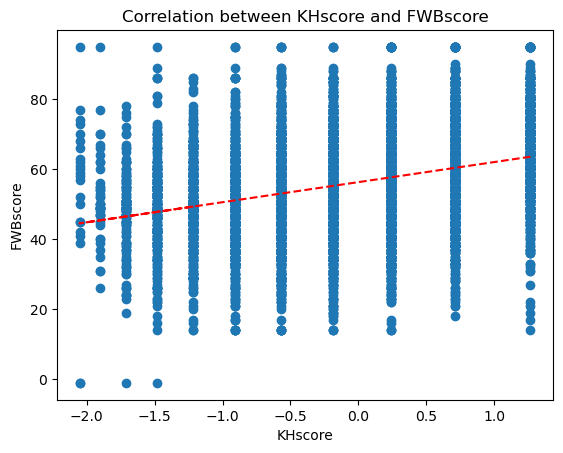

In [25]:
#Step 15: Question 5 Work: Is there a corelation between the 
#"FWBscore" Financial well-being scale and
# "KHscore" Knoll and Houts financial knowledge scale score?
correlation_5 = cleaned_data['KHscore'].corr(cleaned_data['FWBscore'])
print("The correlation between KHscore and FWBscore is:", correlation)
# plotting a scatter plot with a trendline
plt.scatter(cleaned_data['KHscore'], cleaned_data['FWBscore'])
plt.xlabel('KHscore')
plt.ylabel('FWBscore')
plt.title('Correlation between KHscore and FWBscore')

# calculating the trendline
z = np.polyfit(cleaned_data['KHscore'], cleaned_data['FWBscore'], 1)
p = np.poly1d(z)
plt.plot(cleaned_data['KHscore'],p(cleaned_data['KHscore']),"r--")

plt.show()

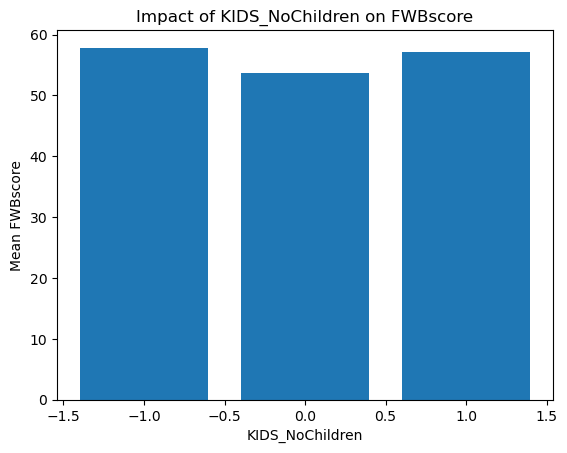

In [26]:
#Step 16: Question 6 Work:Did the column KIDS_NoChildren, KIDS_1, KIDS_2 ,KIDS_3 , KIDS_4 
#have any impact on the FWBscore column. 
column = 'KIDS_NoChildren'
grouped = cleaned_data.groupby(column).mean()
plt.bar(grouped.index, grouped['FWBscore'])
plt.xlabel(column)
plt.ylabel('Mean FWBscore')
plt.title('Impact of ' + column + ' on FWBscore')
plt.show()

#Findings : There is a positive relationship between KIDS_NoChildren and FWBscore, 
#such that higher values of KIDS_NoChildren are associated with higher values of FWBscore.

In [27]:
#Step 17: Question 7 Work: Elia
#BRanch Commit Test***xcx

ljflkdasjfdlsakfjdaslkfjasdlkfjads;lfdsd
klfjsdalk;fjdas
fdasjflaksd
sklkfksdlakjfadslkfj
ksljf;adslkfjads
sjfl;kkasdjf


NameError: name 'ljflkdasjfdlsakfjdaslkfjasdlkfjads' is not defined

In [ ]:
#Step 18: Question 8 Work: Elia

In [ ]:
#Step 19: Question 9 Work: To be Determined.